### Задание 1
Импортируйте библиотеки pandas, numpy и matplotlib.
Загрузите "Boston House Prices dataset" из встроенных наборов 
данных библиотеки sklearn.
Создайте датафреймы X и y из этих данных.
Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.
Масштабируйте данные с помощью StandardScaler.
Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.
Постройте диаграмму рассеяния на этих данных.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

%config InlineBackend.figure_format = 'svg'
%matplotlib inline

In [3]:
from sklearn.datasets import load_boston
boston = load_boston()
target = boston["target"]

In [4]:
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = pd.DataFrame(target, columns=["price"])

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler(with_mean=False)

In [8]:
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [9]:
from sklearn.manifold import TSNE

In [10]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

X_train_tsne = tsne.fit_transform(X_train_scaled)

print('До:\t{}'.format(X_train_scaled.shape))
print('После:\t{}'.format(X_train_tsne.shape))

До:	(404, 13)
После:	(404, 2)


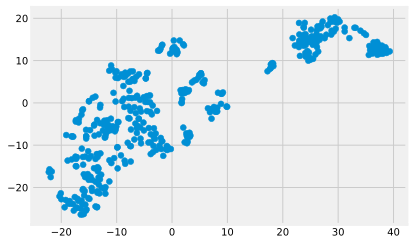

In [11]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])

plt.show()

### Задание 2
С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.
Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.
Вычислите средние значения price и CRIM в разных кластерах.

In [13]:
from sklearn.cluster import KMeans

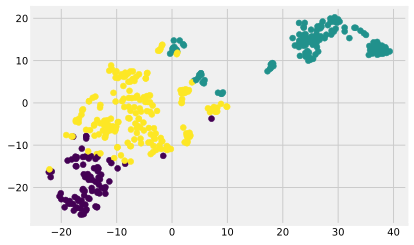

In [67]:
kmeans = KMeans(n_clusters=3,  max_iter=100, random_state=42)

labels_train = kmeans.fit_predict(X_train_scaled)

plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)

plt.show()

Среднее значение цны для каждого кластера

In [27]:
y_0 = y_train[labels_train == 0].mean()
y_0

price    27.788372
dtype: float64

In [28]:
y_1 = y_train[labels_train == 1].mean()
y_1

price    16.165354
dtype: float64

In [29]:
y_2 = y_train[labels_train == 2].mean()
y_2

price    24.958115
dtype: float64

Среднее значение CRIM для каждого кластера

In [37]:
CRIM_0 = X_train.loc[labels_train == 0, 'CRIM'].mean()
CRIM_0

0.07356558139534884

In [38]:
CRIM_1 = X_train.loc[labels_train == 1, 'CRIM'].mean()
CRIM_1

10.797028425196851

In [39]:
CRIM_2 = X_train.loc[labels_train == 2, 'CRIM'].mean()
CRIM_2

0.4216602094240837

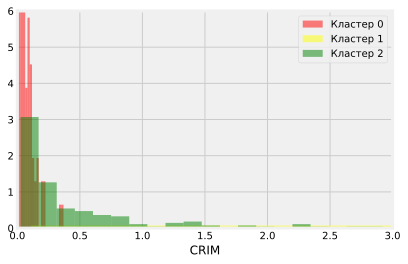

In [122]:
plt.hist(X_train.loc[labels_train == 0, 'CRIM'], bins=20, density=True, alpha=0.5, color = 'red')
plt.hist(X_train.loc[labels_train == 1, 'CRIM'], bins=20, density=True, alpha=0.5, color = 'yellow')
plt.hist(X_train.loc[labels_train == 2, 'CRIM'], bins=20, density=True, alpha=0.5, color = 'green')
plt.xlim(0, 3)
plt.ylim(0, 6)
plt.legend(['Кластер 0', 'Кластер 1', 'Кластер 2'])
plt.xlabel('CRIM')

plt.show()

### *Задание 3
Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.
Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.


In [63]:
labels_test = kmeans.predict(X_test_scaled)

Среднее значение цны для каждого кластера

In [69]:
y_0_test = y_test[labels_test == 0].mean()
y_0_test

price    31.35
dtype: float64

In [70]:
y_1_test = y_test[labels_test == 1].mean()
y_1_test

price    16.437143
dtype: float64

In [71]:
y_2_test = y_test[labels_test == 2].mean()
y_2_test

price    21.860784
dtype: float64

In [72]:
CRIM_0_test = X_test.loc[labels_test == 0, 'CRIM'].mean()
CRIM_0_test

0.06206

In [73]:
CRIM_1_test = X_test.loc[labels_test == 1, 'CRIM'].mean()
CRIM_1_test

10.165531142857143

In [74]:
CRIM_2_test = X_test.loc[labels_test == 2, 'CRIM'].mean()
CRIM_2_test

0.2660788235294118